In [1]:
import keras
import tensorflow as tf
keras.__version__

'2.2.5'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.logging.set_verbosity(tf.logging.ERROR)

# Implement the 'Hello World' of deep learning

Next, we make use of the Python library Keras to learn to classify 
hand-written digits. The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [7]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [8]:
train_images.shape

(60000, 28, 28)

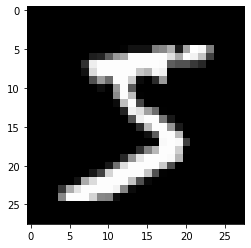

In [13]:
%matplotlib inline
plt.imshow(train_images[0], cmap='gray')

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [8]:
test_images.shape

(10000, 28, 28)

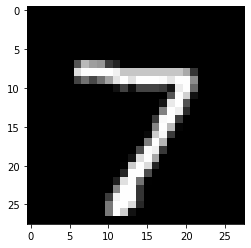

In [14]:
plt.imshow(test_images[0], cmap='gray')

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

In [15]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(1000, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

In [16]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in 
the `[0, 1]` interval. Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with 
values in the `[0, 255]` interval. We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [17]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels:

In [18]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [19]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 17s 279us/step - loss: 0.2373 - acc: 0.9290
Epoch 2/5
60000/60000 [==============================] - 15s 258us/step - loss: 0.0909 - acc: 0.9730
Epoch 3/5
60000/60000 [==============================] - 14s 234us/step - loss: 0.0604 - acc: 0.9815
Epoch 4/5
60000/60000 [==============================] - 13s 220us/step - loss: 0.0425 - acc: 0.9873
Epoch 5/5
60000/60000 [==============================] - 16s 266us/step - loss: 0.0323 - acc: 0.9902


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [20]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 156us/step


In [21]:
print('test_acc:', test_acc)

test_acc: 0.9809


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy. 
This gap between training accuracy and test accuracy is an example of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 

Finally, we visually confirm that the classifications make sense.

Consider this image of the digit


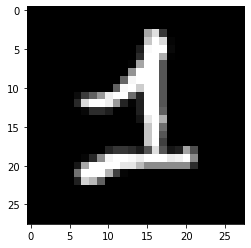

The correct digit is: 1
The neural network predicts: 1 

Consider this image of the digit


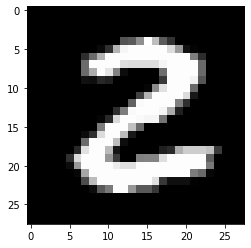

The correct digit is: 2
The neural network predicts: 2 

Consider this image of the digit


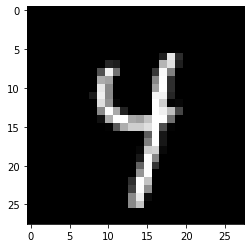

The correct digit is: 4
The neural network predicts: 4 



In [35]:
for pos in range(24,27):
    print('Consider this image of the digit')
    first_image = train_images[pos]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    print('The correct digit is:', list(train_labels[pos]).index(1))
    a = network.predict(train_images[pos:pos+1]).tolist()[0]
    print('The neural network predicts:', a.index(max(a)), '\n')

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in 
less than 20 lines of Python code.